# 국가별 음주 데이터 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 파악

In [5]:
drinks = pd.read_csv("./data/drinks.csv")

In [7]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [9]:
drinks.shape

(193, 6)

In [11]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [13]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [15]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


- 피처
  - country : 국가 정보
  - beer_servings : beer 소비량
  - spirit_servings : spirit 소비량
  - wine_servings : wine 소비량
  - total_litres_of_pure_alcohol : 총 알코올 소비량
  - continent : 국가의 대륙 정보

## 2. 데이터 속성 탐색

- 상관 분석
  - 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것
  - 상관 계수는 공분산의 개념을 포함함
    - 공분산
      - 2개의 확률 변수에 대한 상관 정도
      - 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 경향을 수치로 나타낸 것
      - 공분산 만으로 상관 관계를 구한다면 두 변수의 단위 크기에 영향을 받음
        - 큰 단위의 데이터라면 공분산이 커짐
  - 따라서 상관 계수는 공분산을 -1과 1사이의 값으로 변환한 것
- 상관 관계를 통계적으로 탐색하는 방법
  - 단순 상관 분석 : 피처가 2개일 때의 상관 계수를 계산
  - 다중 상관 분석 : 대산 피처가 여러 개일때 상호 간의 연관성 분석

### 1) beer_servings, wine_servings 의 상관 계수 구하기

In [20]:
drinks[["beer_servings", "wine_servings"]].corr()

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


### 2) 다중 상관 분석

In [23]:
cor_cols = drinks.columns[1:5]
cor_cols

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [25]:
drinks_corr = drinks[cor_cols].corr()
drinks_corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


#### (1) heatmap 시각화

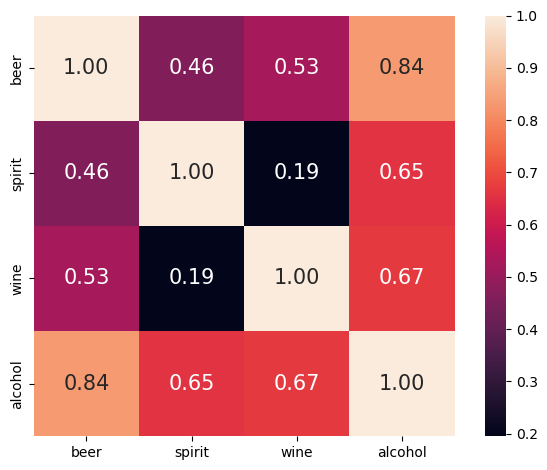

In [28]:
# 그래프 출력을 위해 컬럼명 축약
cols_label = ["beer", "spirit", "wine", "alcohol"]

hm = sns.heatmap(drinks_corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                 annot_kws = {"size" : 15}, yticklabels = cols_label, xticklabels = cols_label)

plt.tight_layout()
plt.show()

#### (2) 산점도 시각화

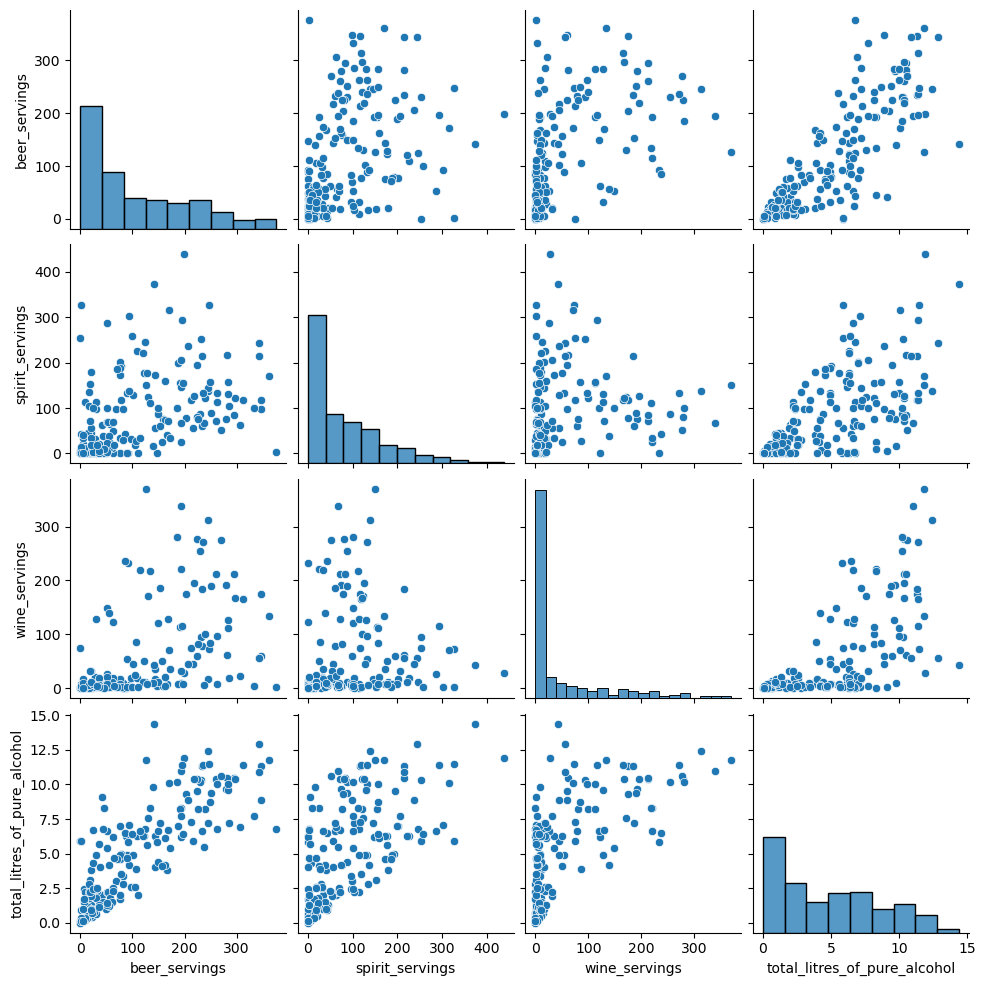

In [32]:
sns.pairplot(drinks[cor_cols])
plt.show()

- total_litres_of_pure_alcohol 피처가 대체적으로 다른 모든 피처와 강한 상관관계가 있는 것으로 보임
- 특히 beer_servings 와의 상관성이 가장 높음

## 3. 데이터 전처리

### 1) continent 결측치 대체

In [37]:
# drinks 데이터의 결측값 확인
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [39]:
# continent의 고윳값
drinks["continent"].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [41]:
# continent가 결측값인 데이터 필터링
drinks[drinks["continent"].isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [43]:
# continent의 결측값을 "NA" 로 대체
drinks["continent"] = drinks["continent"].fillna("NA")

In [45]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [47]:
drinks["continent"].value_counts()

continent
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: count, dtype: int64

## 4. 추가 데이터 탐색

### 1) 각 대륙별 비율 확인

In [51]:
continents = drinks["continent"].value_counts()

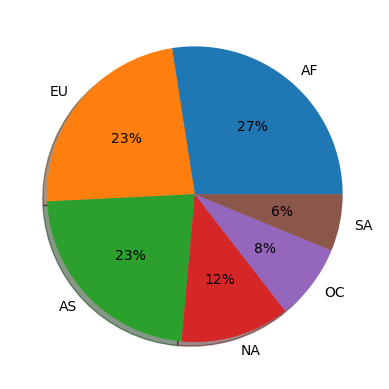

In [53]:
plt.pie(continents.values, labels = continents.index, autopct = "%.0f%%", shadow = True)
plt.show()

### 2) 대륙별 spirit_servings의 통계 정보 확인

- agg 함수
    - 그룹에 대한 여러 가지 연산 결과를 동시에 얻을 수 있는 함수

In [56]:
# 대륙별 spirit_servings 의 평균, 최소, 최대, 합계 확인
stat = drinks.groupby("continent")["spirit_servings"].agg(["mean", "min", "max", "sum"])
stat

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


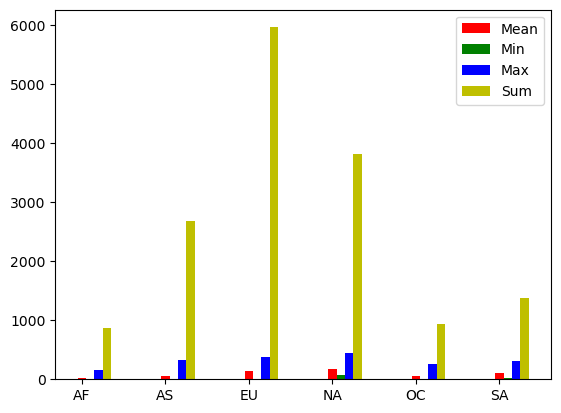

In [58]:
n_groups = len(stat)
idx = np.arange(n_groups)

rects1 = plt.bar(idx, stat["mean"], width = 0.1, color = "r", label = "Mean")
rects2 = plt.bar(idx + 0.1, stat["min"], width = 0.1, color = "g", label = "Min")
rects3 = plt.bar(idx + 0.2, stat["max"], width = 0.1, color = "b", label = "Max")
rects4 = plt.bar(idx + 0.3, stat["sum"], width = 0.1, color = "y", label = "Sum")

plt.xticks(idx, stat.index)
plt.legend()
plt.show()

### 3) 전체 평균보다 더 많은 알코올을 섭취하는 대륙

In [61]:
# 전체 평균
alc_mean = drinks["total_litres_of_pure_alcohol"].mean()
alc_mean

4.717098445595855

In [63]:
# 대륙별 평균
con_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
con_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [65]:
con_mean[con_mean >= alc_mean]

continent
EU    8.617778
NA    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

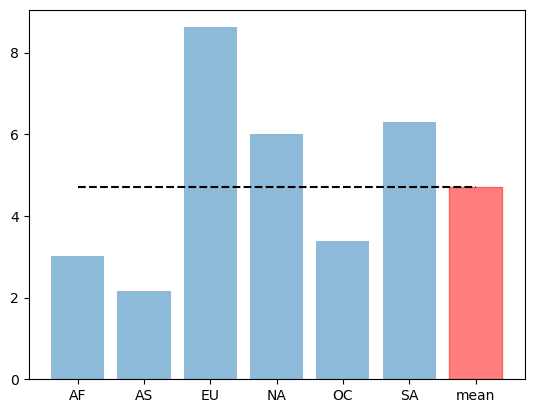

In [67]:
# 전체 평균도 시각화해주기 위해서 대륙 리스트에 mean 추가
continents = con_mean.index.tolist()
continents.append("mean")

x_pos = np.arange(len(continents))

alc = con_mean.tolist()
alc.append(alc_mean)

bar_list = plt.bar(x_pos, alc, alpha = 0.5)

# 마지막 바 만 빨간색으로 변경
bar_list[-1].set_color("r")

# 평균선 그리기
plt.plot([0, len(continents) - 1], [alc_mean, alc_mean], "k--")

plt.xticks(x_pos, continents)
plt.show()

### 4) 평균 beer_servings 가 가장 높은 대륙

- idxmax 함수
  - 시리즈 객체에서 값이 가장 큰 index를 반환

In [70]:
drinks.groupby("continent")["beer_servings"].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [72]:
drinks.groupby("continent")["beer_servings"].mean().idxmax()

'EU'

In [74]:
group_beer = drinks.groupby("continent")["beer_servings"].sum()
group_beer

continent
AF    3258
AS    1630
EU    8720
NA    3345
OC    1435
SA    2101
Name: beer_servings, dtype: int64

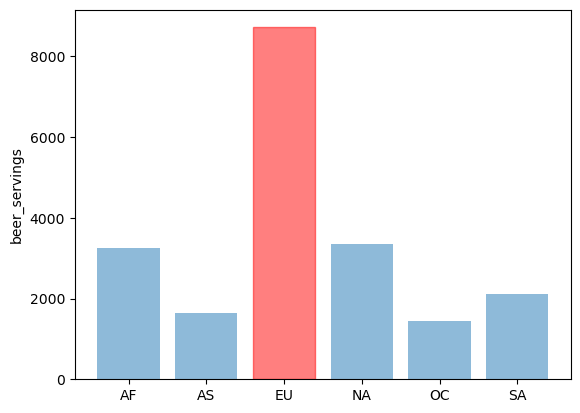

In [76]:
continents = group_beer.index.tolist()
x_pos = np.arange(len(group_beer))

bar_list = plt.bar(x_pos, group_beer, alpha = 0.5)
bar_list[continents.index("EU")].set_color("r")

plt.xticks(x_pos, continents)
plt.ylabel("beer_servings")

plt.show()

In [78]:
continents.index("ASSS")

ValueError: 'ASSS' is not in list

In [80]:
continents.index("EU")

2

### 5) 대륙별 평균 wine_servings

In [83]:
drinks.groupby("continent")["wine_servings"].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
NA     24.521739
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

### 6) total_litres_of_pure_alcohol 이 전체 평균보다 낮은 나라 중 spirit 을 가장 많이 마시는 국가 찾기

In [86]:
alc_mean

4.717098445595855

In [88]:
drinks[drinks["total_litres_of_pure_alcohol"] <= alc_mean]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
2,Algeria,25,0,14,0.7,AF
7,Armenia,21,179,11,3.8,EU
10,Azerbaijan,21,46,5,1.3,EU
12,Bahrain,42,63,7,2.0,AS
...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [90]:
drinks[drinks["total_litres_of_pure_alcohol"] <= alc_mean].sort_values("spirit_servings",
                                                                       ascending = False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
134,Philippines,71,186,1,4.6,AS
7,Armenia,21,179,11,3.8,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
96,Liberia,19,152,2,3.1,AF
43,Cuba,93,137,5,4.2,NA
...,...,...,...,...,...,...
107,Mauritania,0,0,0,0.0,AF
111,Monaco,0,0,0,0.0,EU
118,Nauru,49,0,8,1.0,OC
128,Pakistan,0,0,0,0.0,AS


## 5. 통계 분석

- 지금까지의 분석은 통찰을 발견하는 데 있어서는 유용했지만 분석가의 주관에 따라 분석된 내용이기 때문에 타당성을 입증하기 어려움
- 타당성을 위해서는 통계적으로 검정하는 과정이 필요

### 1) 아프리카와 유럽 간의 맥주 소비량 차이 검정

In [94]:
# 통계 모듈
from scipy import stats

In [96]:
af = drinks[drinks["continent"] == "AF"]
eu = drinks[drinks["continent"] == "EU"]

In [98]:
# 등분산성 검정
result = stats.bartlett(af["beer_servings"], eu["beer_servings"])
result

BartlettResult(statistic=2.1393208136069135, pvalue=0.14356543988378348)

In [100]:
# t 검정
t_result = stats.ttest_ind(af["beer_servings"], eu["beer_servings"], equal_var = True)
t_result

TtestResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11, df=96.0)

#### t검정
- 두 집단 간 평균의 차이에 대한 검정
- 모집단의 평균을 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있음
- 단, 두 집단의 데이터 개수가 비슷하고, 정규 분포인 경우에 신뢰도가 높음

#### t-statistics(t-test 의 검정 통계량 )
- 그 자체로는 아무 의미 없으며 p-value 와 함께 해석해야함
- 귀무가설과의 차이를 뜻함
 
#### p-value(유의확률)
- 가설이 얼마나 믿을만한 것인지를 나타내는 지표
- 데이터를 새로 샘플링 했을 때 귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률
  - 즉, p-value 가 낮으면 귀무가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 됨
    - 보통 그 기준은 0.05나 0.01을 기준으로 함
         
#### 분석 내용
- 귀무 가설 : "두 집단의 평균이 같다"
- p-value 가 0.05 이하로 나타나 귀무 가설이 기각되었음
- 따라서 "아프리카와 유럽 대륙 간의 맥주 소비량 차이" 는 통계적으로 유의미하다